In [1]:
import keras
from keras import layers
from keras import backend as K
from keras import optimizers
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 4 #2

/home/julio/Python/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#signals used to train and test the model 
name = "piminus_Pion-Eta0-PhiPiOver2-Energy50.npy"
data = np.load(name)
print(data.shape)

(20549, 28, 28)


In [3]:
limit = 20549
signal = np.zeros(limit)
for i in range(limit):
    signal[i] = np.sum(data[i].flatten())

In [4]:
temp = 0
for i in range(limit):
    print("Enegy of signal " + str(i) + ": " + str(signal[i]))
    temp  = temp + signal[i]
print("Energia do Sinal Médio >>>>>>>>>>>>> " + str(temp/20549))

Enegy of signal 0: 0.2903674840927124
Enegy of signal 1: 41.57664108276367
Enegy of signal 2: 0.013206344097852707
Enegy of signal 3: 0.6326302886009216
Enegy of signal 4: 20.49186897277832
Enegy of signal 5: 15.251699447631836
Enegy of signal 6: 0.26960715651512146
Enegy of signal 7: 0.28193148970603943
Enegy of signal 8: 24.208019256591797
Enegy of signal 9: 3.4114229679107666
Enegy of signal 10: 21.176002502441406
Enegy of signal 11: 0.725356936454773
Enegy of signal 12: 0.370684415102005
Enegy of signal 13: 26.876821517944336
Enegy of signal 14: 0.3748722970485687
Enegy of signal 15: 0.2592140734195709
Enegy of signal 16: 18.806360244750977
Enegy of signal 17: 11.39218521118164
Enegy of signal 18: 0.291858434677124
Enegy of signal 19: 15.809152603149414
Enegy of signal 20: 0.5236045718193054
Enegy of signal 21: 23.778791427612305
Enegy of signal 22: 5.611175060272217
Enegy of signal 23: 27.989086151123047
Enegy of signal 24: 7.734916687011719
Enegy of signal 25: 6.966787815093994
E

Enegy of signal 1966: 0.3157241940498352
Enegy of signal 1967: 26.13762855529785
Enegy of signal 1968: 24.248186111450195
Enegy of signal 1969: 0.2921154499053955
Enegy of signal 1970: 0.3358292877674103
Enegy of signal 1971: 27.25651741027832
Enegy of signal 1972: 1.1315515041351318
Enegy of signal 1973: 20.53510856628418
Enegy of signal 1974: 0.3637934625148773
Enegy of signal 1975: 1.6917716264724731
Enegy of signal 1976: 24.692203521728516
Enegy of signal 1977: 43.95587921142578
Enegy of signal 1978: 28.019554138183594
Enegy of signal 1979: 0.2762286067008972
Enegy of signal 1980: 10.775227546691895
Enegy of signal 1981: 2.2683486938476562
Enegy of signal 1982: 0.4781755805015564
Enegy of signal 1983: 10.256032943725586
Enegy of signal 1984: 0.2840498983860016
Enegy of signal 1985: 27.786361694335938
Enegy of signal 1986: 21.008731842041016
Enegy of signal 1987: 9.858288764953613
Enegy of signal 1988: 0.42267143726348877
Enegy of signal 1989: 5.403690338134766
Enegy of signal 1990:

Enegy of signal 2965: 2.013674736022949
Enegy of signal 2966: 0.44026315212249756
Enegy of signal 2967: 2.601984977722168
Enegy of signal 2968: 19.353300094604492
Enegy of signal 2969: 47.902305603027344
Enegy of signal 2970: 0.2679184079170227
Enegy of signal 2971: 0.27130651473999023
Enegy of signal 2972: 37.318782806396484
Enegy of signal 2973: 1.473267912864685
Enegy of signal 2974: 0.3477760851383209
Enegy of signal 2975: 29.87950325012207
Enegy of signal 2976: 46.75322723388672
Enegy of signal 2977: 0.7062052488327026
Enegy of signal 2978: 0.31085479259490967
Enegy of signal 2979: 17.552980422973633
Enegy of signal 2980: 0.739477276802063
Enegy of signal 2981: 24.943866729736328
Enegy of signal 2982: 33.09563064575195
Enegy of signal 2983: 34.36517333984375
Enegy of signal 2984: 20.87172508239746
Enegy of signal 2985: 21.17867660522461
Enegy of signal 2986: 0.37699994444847107
Enegy of signal 2987: 4.310839653015137
Enegy of signal 2988: 0.27261117100715637
Enegy of signal 2989: 

Enegy of signal 4465: 0.36128050088882446
Enegy of signal 4466: 18.655902862548828
Enegy of signal 4467: 23.83560562133789
Enegy of signal 4468: 31.761287689208984
Enegy of signal 4469: 37.8564453125
Enegy of signal 4470: 0.37423378229141235
Enegy of signal 4471: 1.1561188697814941
Enegy of signal 4472: 0.30758652091026306
Enegy of signal 4473: 0.26479148864746094
Enegy of signal 4474: 19.75529670715332
Enegy of signal 4475: 22.758403778076172
Enegy of signal 4476: 25.024250030517578
Enegy of signal 4477: 18.081676483154297
Enegy of signal 4478: 21.050567626953125
Enegy of signal 4479: 8.152617454528809
Enegy of signal 4480: 34.45033264160156
Enegy of signal 4481: 12.12761402130127
Enegy of signal 4482: 29.141359329223633
Enegy of signal 4483: 0.27044177055358887
Enegy of signal 4484: 5.44991397857666
Enegy of signal 4485: 10.39539623260498
Enegy of signal 4486: 2.3030266761779785
Enegy of signal 4487: 20.818811416625977
Enegy of signal 4488: 31.300907135009766
Enegy of signal 4489: 41

Enegy of signal 5464: 0.4191041588783264
Enegy of signal 5465: 16.727054595947266
Enegy of signal 5466: 0.26417022943496704
Enegy of signal 5467: 15.068726539611816
Enegy of signal 5468: 9.009349822998047
Enegy of signal 5469: 0.27484068274497986
Enegy of signal 5470: 14.05332088470459
Enegy of signal 5471: 0.29498085379600525
Enegy of signal 5472: 23.139766693115234
Enegy of signal 5473: 16.66200828552246
Enegy of signal 5474: 0.2225467562675476
Enegy of signal 5475: 5.715685844421387
Enegy of signal 5476: 5.022037029266357
Enegy of signal 5477: 12.548182487487793
Enegy of signal 5478: 5.331470489501953
Enegy of signal 5479: 0.4281885027885437
Enegy of signal 5480: 16.142990112304688
Enegy of signal 5481: 0.2465159296989441
Enegy of signal 5482: 27.498470306396484
Enegy of signal 5483: 0.34541234374046326
Enegy of signal 5484: 0.2715471684932709
Enegy of signal 5485: 2.9932196140289307
Enegy of signal 5486: 23.936525344848633
Enegy of signal 5487: 10.267683982849121
Enegy of signal 54

Enegy of signal 6964: 0.38874056935310364
Enegy of signal 6965: 0.28302788734436035
Enegy of signal 6966: 25.38520050048828
Enegy of signal 6967: 21.08621597290039
Enegy of signal 6968: 0.05777471512556076
Enegy of signal 6969: 0.34543487429618835
Enegy of signal 6970: 0.5312467217445374
Enegy of signal 6971: 0.3826175630092621
Enegy of signal 6972: 20.900615692138672
Enegy of signal 6973: 36.65586853027344
Enegy of signal 6974: 0.287141889333725
Enegy of signal 6975: 1.1989680528640747
Enegy of signal 6976: 30.125995635986328
Enegy of signal 6977: 19.6162109375
Enegy of signal 6978: 0.3152434527873993
Enegy of signal 6979: 15.785158157348633
Enegy of signal 6980: 0.396513432264328
Enegy of signal 6981: 0.3582128584384918
Enegy of signal 6982: 7.905755519866943
Enegy of signal 6983: 33.641727447509766
Enegy of signal 6984: 0.38135290145874023
Enegy of signal 6985: 13.105591773986816
Enegy of signal 6986: 0.33878588676452637
Enegy of signal 6987: 29.12904167175293
Enegy of signal 6988: 

Enegy of signal 8963: 22.236774444580078
Enegy of signal 8964: 20.07626724243164
Enegy of signal 8965: 0.2895429730415344
Enegy of signal 8966: 12.74810791015625
Enegy of signal 8967: 0.41490438580513
Enegy of signal 8968: 8.397221565246582
Enegy of signal 8969: 8.691176414489746
Enegy of signal 8970: 1.8594549894332886
Enegy of signal 8971: 16.517127990722656
Enegy of signal 8972: 0.5366219282150269
Enegy of signal 8973: 5.582722187042236
Enegy of signal 8974: 0.3088245391845703
Enegy of signal 8975: 13.482551574707031
Enegy of signal 8976: 21.61141014099121
Enegy of signal 8977: 0.2735726237297058
Enegy of signal 8978: 6.4067230224609375
Enegy of signal 8979: 22.479965209960938
Enegy of signal 8980: 0.6496434807777405
Enegy of signal 8981: 1.053760290145874
Enegy of signal 8982: 0.3546304404735565
Enegy of signal 8983: 14.376572608947754
Enegy of signal 8984: 0.09564855694770813
Enegy of signal 8985: 0.4557042121887207
Enegy of signal 8986: 2.4020426273345947
Enegy of signal 8987: 7.

Enegy of signal 10963: 0.28362441062927246
Enegy of signal 10964: 20.247356414794922
Enegy of signal 10965: 0.618040919303894
Enegy of signal 10966: 29.199172973632812
Enegy of signal 10967: 0.3198223114013672
Enegy of signal 10968: 0.6682926416397095
Enegy of signal 10969: 0.21622171998023987
Enegy of signal 10970: 5.047043800354004
Enegy of signal 10971: 2.1025848388671875
Enegy of signal 10972: 0.27501440048217773
Enegy of signal 10973: 6.565320014953613
Enegy of signal 10974: 7.050813674926758
Enegy of signal 10975: 0.4140574038028717
Enegy of signal 10976: 0.4239911437034607
Enegy of signal 10977: 0.26478976011276245
Enegy of signal 10978: 10.381103515625
Enegy of signal 10979: 0.3813168406486511
Enegy of signal 10980: 12.128410339355469
Enegy of signal 10981: 5.4590744972229
Enegy of signal 10982: 0.2648327350616455
Enegy of signal 10983: 0.5238134860992432
Enegy of signal 10984: 0.2583479881286621
Enegy of signal 10985: 0.25381624698638916
Enegy of signal 10986: 0.30669865012168

Enegy of signal 12962: 0.1072494238615036
Enegy of signal 12963: 2.963629961013794
Enegy of signal 12964: 16.856740951538086
Enegy of signal 12965: 5.947486877441406
Enegy of signal 12966: 20.84145736694336
Enegy of signal 12967: 0.30425193905830383
Enegy of signal 12968: 2.2978429794311523
Enegy of signal 12969: 0.01244252361357212
Enegy of signal 12970: 0.34690824151039124
Enegy of signal 12971: 10.2869291305542
Enegy of signal 12972: 30.169313430786133
Enegy of signal 12973: 31.446910858154297
Enegy of signal 12974: 0.5332686901092529
Enegy of signal 12975: 0.3385273218154907
Enegy of signal 12976: 0.9729281067848206
Enegy of signal 12977: 0.2895786762237549
Enegy of signal 12978: 4.6769866943359375
Enegy of signal 12979: 5.434624195098877
Enegy of signal 12980: 12.752887725830078
Enegy of signal 12981: 13.064786911010742
Enegy of signal 12982: 0.26489555835723877
Enegy of signal 12983: 0.23446190357208252
Enegy of signal 12984: 5.686158180236816
Enegy of signal 12985: 18.0372428894

Enegy of signal 14962: 10.023229598999023
Enegy of signal 14963: 0.011999525129795074
Enegy of signal 14964: 13.476845741271973
Enegy of signal 14965: 16.31285285949707
Enegy of signal 14966: 4.3394999504089355
Enegy of signal 14967: 0.38975363969802856
Enegy of signal 14968: 0.31903576850891113
Enegy of signal 14969: 14.250405311584473
Enegy of signal 14970: 15.861011505126953
Enegy of signal 14971: 40.66413879394531
Enegy of signal 14972: 18.33191680908203
Enegy of signal 14973: 1.1498841047286987
Enegy of signal 14974: 0.47597911953926086
Enegy of signal 14975: 0.5201053619384766
Enegy of signal 14976: 0.32529541850090027
Enegy of signal 14977: 2.446995258331299
Enegy of signal 14978: 1.455204963684082
Enegy of signal 14979: 7.171935081481934
Enegy of signal 14980: 0.2539238929748535
Enegy of signal 14981: 0.25805264711380005
Enegy of signal 14982: 0.29095587134361267
Enegy of signal 14983: 0.47604280710220337
Enegy of signal 14984: 0.27417880296707153
Enegy of signal 14985: 18.4611

Enegy of signal 16961: 16.838138580322266
Enegy of signal 16962: 45.269893646240234
Enegy of signal 16963: 12.858488082885742
Enegy of signal 16964: 15.785682678222656
Enegy of signal 16965: 43.754966735839844
Enegy of signal 16966: 20.34558868408203
Enegy of signal 16967: 14.248819351196289
Enegy of signal 16968: 0.2894402742385864
Enegy of signal 16969: 28.445066452026367
Enegy of signal 16970: 4.0521769523620605
Enegy of signal 16971: 15.797191619873047
Enegy of signal 16972: 0.42638424038887024
Enegy of signal 16973: 42.21780014038086
Enegy of signal 16974: 0.40002045035362244
Enegy of signal 16975: 0.27017951011657715
Enegy of signal 16976: 1.0275145769119263
Enegy of signal 16977: 12.76004409790039
Enegy of signal 16978: 0.3609554171562195
Enegy of signal 16979: 22.685916900634766
Enegy of signal 16980: 1.3247723579406738
Enegy of signal 16981: 15.726438522338867
Enegy of signal 16982: 11.675371170043945
Enegy of signal 16983: 18.395282745361328
Enegy of signal 16984: 0.326357245

Enegy of signal 18961: 37.124385833740234
Enegy of signal 18962: 15.894248008728027
Enegy of signal 18963: 10.059208869934082
Enegy of signal 18964: 0.38320809602737427
Enegy of signal 18965: 10.456962585449219
Enegy of signal 18966: 25.64691734313965
Enegy of signal 18967: 21.976421356201172
Enegy of signal 18968: 3.0393688678741455
Enegy of signal 18969: 26.10521697998047
Enegy of signal 18970: 16.865795135498047
Enegy of signal 18971: 0.4459638297557831
Enegy of signal 18972: 11.773602485656738
Enegy of signal 18973: 41.69571304321289
Enegy of signal 18974: 0.2897929251194
Enegy of signal 18975: 36.5900764465332
Enegy of signal 18976: 19.032989501953125
Enegy of signal 18977: 0.37520700693130493
Enegy of signal 18978: 0.27156803011894226
Enegy of signal 18979: 2.887490749359131
Enegy of signal 18980: 10.523946762084961
Enegy of signal 18981: 0.3307628035545349
Enegy of signal 18982: 0.47116559743881226
Enegy of signal 18983: 17.731584548950195
Enegy of signal 18984: 0.34385123848915

In [5]:
print("Sinal usado neste ensaio : " + name)

Sinal usado neste ensaio : piminus_Pion-Eta0-PhiPiOver2-Energy50.npy


In [6]:
print("Maxima Energia: "+str(np.max(signal)))

Maxima Energia: 49.12188720703125


In [7]:
print("Mínima Energia: "+str(np.min(signal)))

Mínima Energia: 0.010009774006903172


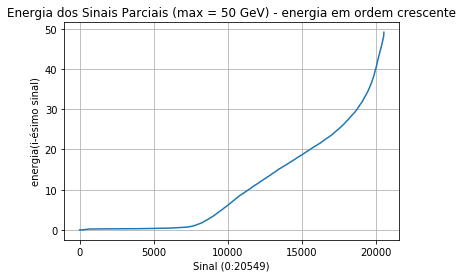

In [8]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - energia em ordem crescente")
plt.xlabel("Sinal (0:20549)")
plt.ylabel("energia(i-ésimo sinal)")
plt.grid()
plt.plot((np.sort(signal)))
plt.show()

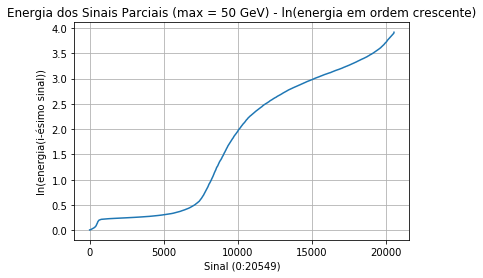

In [9]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - ln(energia em ordem crescente)")
plt.xlabel("Sinal (0:20549)")
plt.ylabel("ln(energia(i-ésimo sinal))")
plt.grid()
plt.plot(np.log1p(np.sort(signal)))
plt.show()


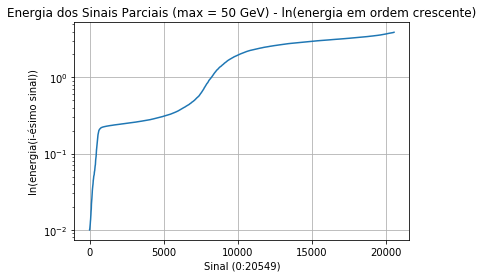

In [10]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - ln(energia em ordem crescente)")
plt.xlabel("Sinal (0:20549)")
plt.ylabel("ln(energia(i-ésimo sinal))")
plt.grid()
plt.semilogy()
plt.plot(np.log1p(np.sort(signal)))
plt.show()

In [11]:
#Redução do Conjunto de Dados (Apenas os sinais com Enegia <= 0.5 Gev)

In [12]:
data_t = data[signal < 0.5]

In [13]:
data_t.shape #6399/20549  Sinais parciais que serão usados na simulacao

(6399, 28, 28)

In [14]:
limit = data_t.shape[0]
print(limit)
signal_t = np.zeros(limit) #6399 componentes 
for i in range(limit): #0 a 6398 
    signal_t[i] = np.sum(data_t[i].flatten()) #cada componente do sinal (i) acumula a energia em data_t[i] apenas sinais com menos de 0.5GeV

6399


In [15]:
print("Maxima Energia: "+str(np.max(signal_t))) #confirma que estamos trabalhando na faixa Gev < 0.5 

Maxima Energia: 0.499929815530777


In [16]:
print("Mínima Energia: "+str(np.min(signal_t))) # Gev < 0.5 (descartamos todos os demais gerais de nossa massa de testes)

Mínima Energia: 0.010009774006903172


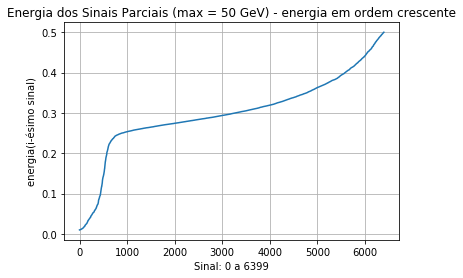

In [17]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - energia em ordem crescente")
plt.xlabel("Sinal: 0 a 6399")
plt.ylabel("energia(i-ésimo sinal)")
plt.grid()
plt.plot((np.sort(signal_t)))
plt.show()

In [18]:
#Simulação com o sub_conjunto de dados

In [19]:
input_img = keras.Input(shape=img_shape)
x = layers.Conv2D(32, 3,padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [20]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon
z = layers.Lambda(sampling)([z_mean, z_log_var])

In [21]:
decoder_input = layers.Input(K.int_shape(z)[1:])
x = layers.Dense(np.prod(shape_before_flattening[1:]),activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3,padding='same',activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same',activation='sigmoid')(x)
decoder = Model(decoder_input, x)
z_decoded = decoder(z)

In [22]:
class CustomVariationalLayer(keras.layers.Layer):
   
    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)
    
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
y = CustomVariationalLayer()([input_img, z_decoded])
    

In [23]:
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)

In [24]:
#Massa de Dados para Simulação: data_t, ou seja sinais com Energia <= 0.5 Gev
data_t.shape
print("20% de validacao")
data_t_train = data_t[:5119,:,:]
data_t_test = data_t[5119:,:,:]

20% de validacao


In [25]:
data_t.shape

(6399, 28, 28)

In [26]:
data_t_train.shape

(5119, 28, 28)

In [27]:
data_t_test.shape

(1280, 28, 28)

In [28]:
data_t_train = data_t_train.reshape(data_t_train.shape + (1,))
print(data_t_train.shape)
data_t_test = data_t_test.reshape(data_t_test.shape + (1,))
print(data_t_test.shape)
vae.fit(x=data_t_train, y=None,shuffle=True,epochs=3,batch_size=100,validation_data=(data_t_test, None))

(5119, 28, 28, 1)
(1280, 28, 28, 1)
Train on 5119 samples, validate on 1280 samples
Epoch 1/3
5119/5119 [==============================] - 11s 2ms/step - loss: 0.3673 - val_loss: 0.0077
Epoch 2/3
5119/5119 [==============================] - 11s 2ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 3/3
5119/5119 [==============================] - 12s 2ms/step - loss: 0.0017 - val_loss: 0.0014


In [29]:
np.sort(signal_t).shape #Sinais Originais com Energia < 0.5 

(6399,)

In [30]:
sreal_t = np.zeros(784) #Sinal real gerado por todos os sinais com energia < 0.5 Gev
limit = data_t.shape[0]
print(limit) #limit = 6399
for i in range(limit):
    sreal_t = sreal_t + data_t[i].flatten() #integração dos sinais parciais 0 a 6398, Energia < 0.5 GeV


6399


In [31]:
#Sinal Real com Energia Inferior a 0.5 Gev 
print("Energia do Sinal Real Gerado pela Integração de 6399 sinais < 0.5 GeV : "+str(np.sum(sreal_t)/6399))

Energia do Sinal Real Gerado pela Integração de 6399 sinais < 0.5 GeV : 0.2997009527403352


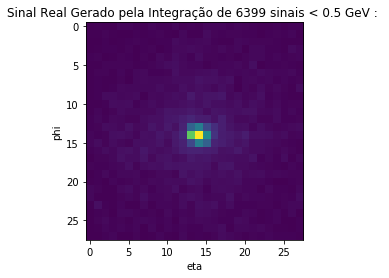

In [32]:
plt.title("Sinal Real Gerado pela Integração de 6399 sinais < 0.5 GeV : ")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.log1p(sreal_t.reshape(28,28)))
plt.show()


In [33]:
#Contrução de um Sinal Sintético usando os sinais gerado a partir do espaço latente do autoenconder. 
limit_i = 80
limit_j = 80
signal_counter = 0 

synthetic_signal = np.zeros((1,28,28))
partial_signals = np.zeros((limit_i*limit_j,28,28))
print(synthetic_signal.shape)
print(partial_signals.shape)
for i in range(limit_i):
    for j in range(limit_j):
        z_sample = np.array([[i, j]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, latent_dim)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        partial_signals[signal_counter,:,:] = x_decoded[0].reshape(28,28)
        signal_counter = signal_counter + 1 
        synthetic_signal = synthetic_signal + x_decoded[0].reshape(28,28) 


(1, 28, 28)
(6400, 28, 28)


ValueError: cannot reshape array of size 32 into shape (16,4)

In [ ]:
print("Numero de Sinais Sintéticos Parciais Gerados a partir do Espaço Latente : "+str(partial_signals.shape))


In [ ]:
print("Sinal Sintetico Contruido pela Integração dos 6400 Sinais Sintéticos Parciais: "+(str(synthetic_signal.shape)))


In [ ]:
print("Sinal Sintético (ln)formado por:"+str(limit_i*limit_j)+" amostras")
plt.imshow(np.log1p(synthetic_signal[0,:,:]))
plt.show()

In [ ]:
#Eta e Phi do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV
real = sreal_t.reshape(28,28) 
plt.title("Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(real)
plt.show()

plt.title("Eta do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
eta = np.sum(real/6400,axis=0)
plt.plot(eta)
plt.show()

plt.title("Phi do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
phi = np.sum(real/6400,axis=1)
plt.plot(phi)
plt.show()


In [ ]:
syn = synthetic_signal.reshape(28,28) 
plt.title("Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.log1p(syn))
plt.show()

plt.title("Eta do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
eta = np.sum(syn/6400,axis=0)
plt.plot(eta)
plt.show()

plt.title("Phi do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
phi = np.sum(syn/6400,axis=1)
plt.plot(phi)
plt.show()

In [ ]:
#Sobreposicao 
plt.title("Eta do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
eta = np.sum(real/6400,axis=0)
plt.plot(eta)

plt.title("Eta do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
eta = np.sum(syn/6400,axis=0)
plt.plot(eta)

plt.show()


plt.title("Phi do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
phi = np.sum(real/6400,axis=1)
plt.plot(phi)

plt.title("Phi do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
phi = np.sum(syn/6400,axis=1)
plt.plot(phi)

plt.show()